# Bootstrapping PCA In The Digits Dataset

This notebook illustrates finding feature importance in the Iris dataset.

The main point it shows is using ``pandas`` structures throughout the code.

## Loading The Data 

First we load the dataset into a ``pandas.DataFrame``.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
sns.set_style('whitegrid')

from ibex.sklearn import decomposition as pd_decomposition
from ibex.sklearn import linear_model as pd_linear_model
from ibex.sklearn import model_selection as pd_model_selection

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
digits = datasets.load_digits()
features = ['f%d' % i for i in range(digits['data'].shape[1])]
digits = pd.DataFrame(
    np.c_[digits['data'], digits['target']], 
    columns=features+['digit'])
digits = digits.sample(frac=0.1).reset_index()
digits.head()

,index,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f55,f56,f57,f58,f59,f60,f61,f62,f63,digit
0,1541,0,0,5,12,9,1,0,0,0,...,0,0,0,7,15,12,2,0,0,0
1,1295,0,0,4,15,13,3,0,0,0,...,0,0,0,5,15,16,5,0,0,8
2,798,0,3,16,15,6,0,0,0,0,...,0,0,4,16,16,16,14,3,0,2
3,1098,0,0,0,8,16,16,7,0,0,...,0,0,0,0,11,14,2,0,0,5
4,498,0,0,2,5,5,11,15,5,0,...,0,0,0,0,15,5,0,0,0,7


## Explained Variance Per Number Of Features

Now that all the data is in a ``DataFrame``, we can use the ``feature_importances_`` attribute of a gradient boosting classifier. Note that in Ibex, this is a ``pandas.Series``.

Since the result is a ``Series``, we can use its ``plot`` method directly, and it will handle all labels for us.

In [3]:
pca = pd_decomposition.PCA()

variance_ratios = []
for tr, te in pd_model_selection.ShuffleSplit(100, test_size=0.15).split(digits):
    X_tr, _ = digits.ix[tr][features], digits.ix[tr].digit
    
    variance_ratios.append(pca.fit(X_tr).explained_variance_ratio_)
    
variance_ratios = pd.DataFrame(variance_ratios)

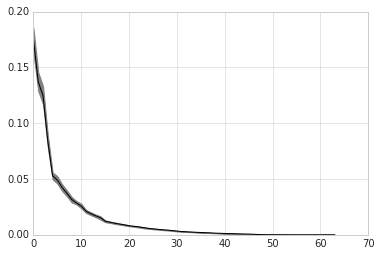

In [4]:
plot(variance_ratios.mean(), color='black');
fill_between(
    range(len(variance_ratios.columns)), 
    variance_ratios.quantile(0.025), 
    variance_ratios.quantile(0.975),
    color='grey');

In [7]:
clf = pca | pd_linear_model.LogisticRegression()

In [8]:
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

estimator = pd_model_selection.GridSearchCV(
    clf,
    {'pca__n_components': [20, 40, 64], 'logisticregression__C': np.logspace(-4, 4, 3)})
    
estimator.fit(digits[features], digits.digit)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
type(clf)
